
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0.0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

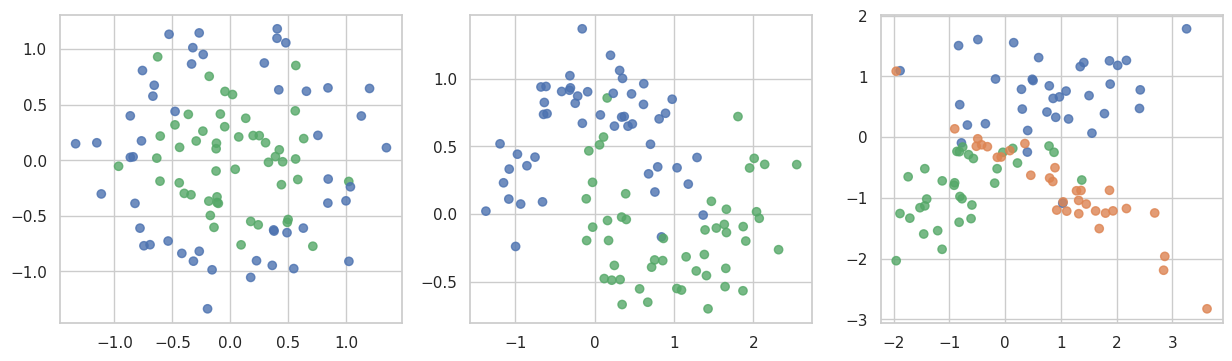

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

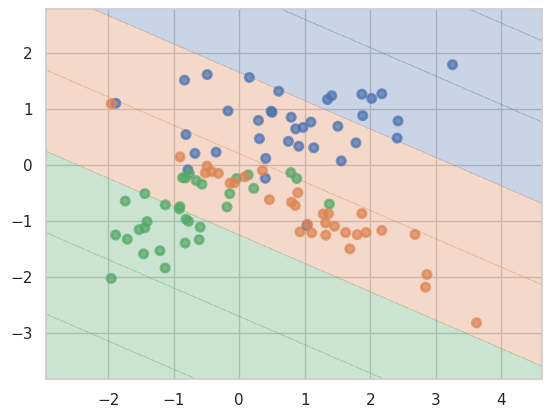

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1 Training Accuracy: 1.00
Dataset 1 Testing Accuracy: 0.73
Is overfitting? Yes

Dataset 2 Training Accuracy: 1.00
Dataset 2 Testing Accuracy: 0.87
Is overfitting? Yes

Dataset 3 Training Accuracy: 1.00
Dataset 3 Testing Accuracy: 0.90
Is overfitting? Yes



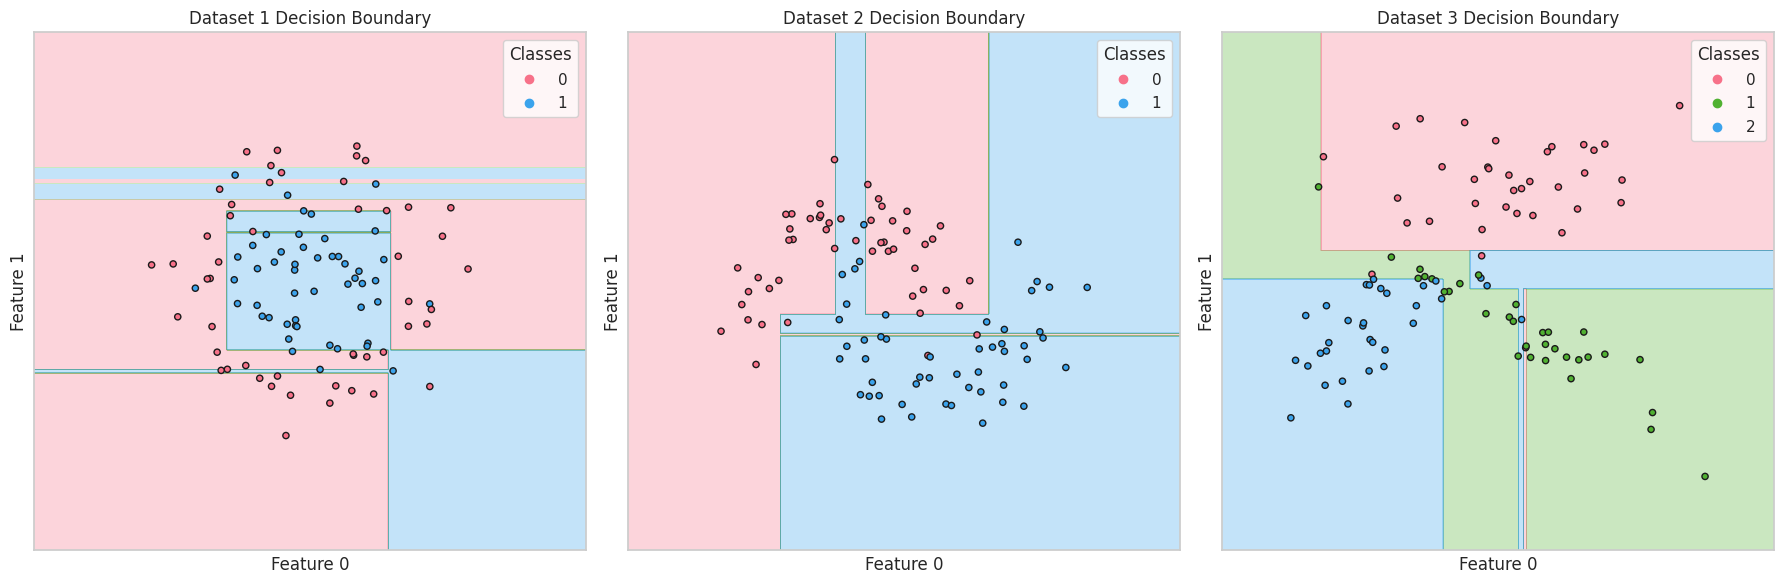

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_features=2, n_redundant=0, n_informative=2,
                        n_clusters_per_class=1, n_classes=3, random_state=3)
]

def plot_surface(clf, X, y, subplot, title):
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=ListedColormap(sns.color_palette("husl", 3)), alpha=0.3)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(sns.color_palette("husl", 3)), edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.legend(*scatter.legend_elements(), title="Classes")

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    plt.subplot(1, 3, i+1)
    plot_surface(clf, X, y, i+1, f"Dataset {i+1} Decision Boundary")

    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    print(f"Dataset {i+1} Training Accuracy: {train_accuracy:.2f}")
    print(f"Dataset {i+1} Testing Accuracy: {test_accuracy:.2f}")
    print(f"Is overfitting? {'Yes' if train_accuracy > test_accuracy else 'No'}\n")

plt.tight_layout()
plt.show()

__Ответ:__ По результатам видно переобучение, так как на тестовых данных заметно снижена точность.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 1, max_depth=None, min_samples_leaf=1
Training Accuracy: 1.00
Testing Accuracy: 0.73
Is overfitting? Yes

Dataset 2, max_depth=None, min_samples_leaf=1
Training Accuracy: 1.00
Testing Accuracy: 0.87
Is overfitting? Yes

Dataset 3, max_depth=None, min_samples_leaf=1
Training Accuracy: 1.00
Testing Accuracy: 0.90
Is overfitting? Yes

Dataset 1, max_depth=None, min_samples_leaf=5
Training Accuracy: 0.87
Testing Accuracy: 0.90
Is overfitting? No

Dataset 2, max_depth=None, min_samples_leaf=5
Training Accuracy: 0.96
Testing Accuracy: 0.73
Is overfitting? Yes

Dataset 3, max_depth=None, min_samples_leaf=5
Training Accuracy: 0.91
Testing Accuracy: 0.80
Is overfitting? Yes

Dataset 1, max_depth=3, min_samples_leaf=1
Training Accuracy: 0.89
Testing Accuracy: 0.73
Is overfitting? Yes

Dataset 2, max_depth=3, min_samples_leaf=1
Training Accuracy: 0.91
Testing Accuracy: 0.93
Is overfitting? No

Dataset 3, max_depth=3, min_samples_leaf=1
Training Accuracy: 0.96
Testing Accuracy: 0.90
Is ove

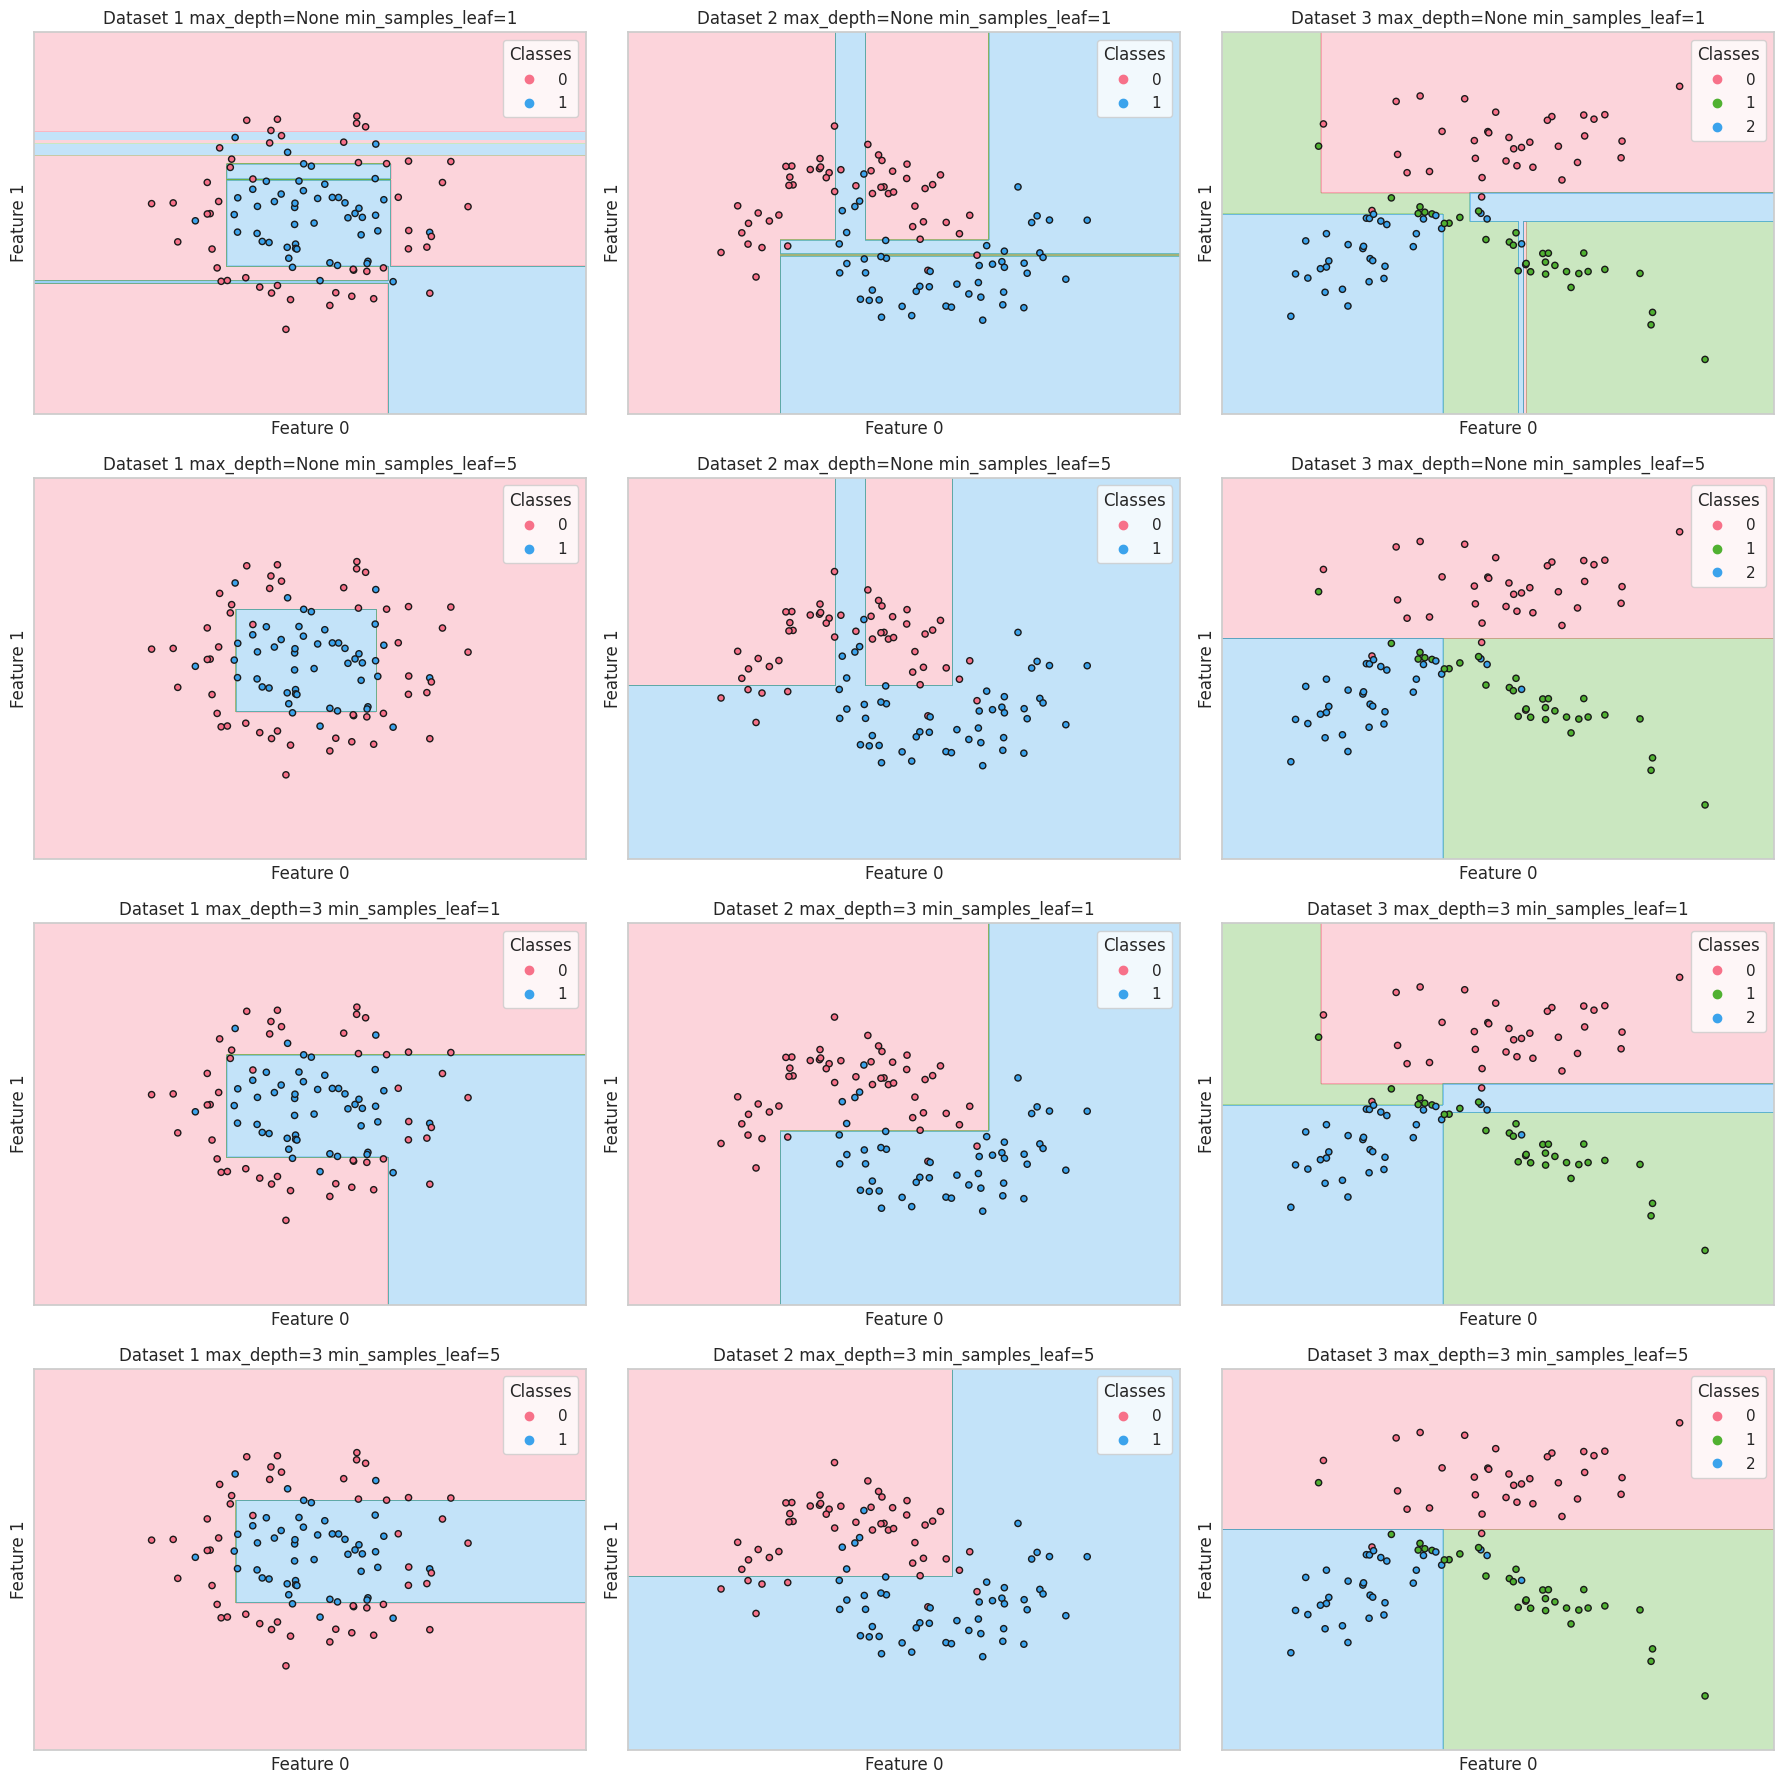

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(18, 18))

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_features=2, n_redundant=0, n_informative=2,
                        n_clusters_per_class=1, n_classes=3, random_state=3)
]

def plot_surface(clf, X, y, subplot, title):
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=ListedColormap(sns.color_palette("husl", 3)), alpha=0.3)

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(sns.color_palette("husl", 3)), edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.legend(*scatter.legend_elements(), title="Classes")

hyperparameters = [
    (None, 1),
    (None, 5),
    (3, 1),
    (3, 5)
]

for i, (max_depth, min_samples_leaf) in enumerate(hyperparameters):
    plt.subplot(4, 3, 3*i+1)
    for j, (X, y) in enumerate(datasets):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)

        plt.subplot(4, 3, 3*i + j + 1)
        plot_surface(clf, X, y, i+1, f"Dataset {j+1} max_depth={max_depth} min_samples_leaf={min_samples_leaf}")

        train_accuracy = accuracy_score(y_train, clf.predict(X_train))
        test_accuracy = accuracy_score(y_test, clf.predict(X_test))

        print(f"Dataset {j+1}, max_depth={max_depth}, min_samples_leaf={min_samples_leaf}")
        print(f"Training Accuracy: {train_accuracy:.2f}")
        print(f"Testing Accuracy: {test_accuracy:.2f}")
        print(f"Is overfitting? {'Yes' if train_accuracy > test_accuracy else 'No'}\n")

plt.tight_layout()
plt.show()

__Ответ:__ Деревья решений с глубиной max_depth=None и минимальным количеством листьев min_samples_leaf=1 всегда переобучаются.
Использование параметра min_samples_leaf=5 уменьшает степень переобучения, но не во всех случаях устраняет его полностью.
Ограничение глубины дерева max_depth=3 помогает избежать переобучения в некоторых случаях, но не всегда, особенно в сочетании с min_samples_leaf=5.
Датасет 2 с параметрами max_depth=3, min_samples_leaf=1 показал отсутствие переобучения.Таким образом, для минимизации переобучения можно использовать ограничения глубины дерева и увеличение минимального количества листьев и проверять на практике.


# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

data = pd.read_csv('students.csv')

print(data.head())

print(data.columns)

    STG   SCG   STR   LPR   PEG  UNS
0  0.00  0.00  0.00  0.00  0.00    0
1  0.08  0.08  0.10  0.24  0.90    1
2  0.06  0.06  0.05  0.25  0.33    0
3  0.10  0.10  0.15  0.65  0.30    1
4  0.08  0.08  0.08  0.98  0.24    0
Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')


In [11]:
import numpy as np

def find_best_split(feature_vector, target_vector):
    sort_idx = np.argsort(feature_vector)
    feature_vector, target_vector = feature_vector[sort_idx], target_vector[sort_idx]

    unique_thresholds = np.unique(feature_vector[:-1] + np.diff(feature_vector) / 2)

    best_threshold = None
    best_gini = float('inf')
    thresholds = []
    ginis = []

    for threshold in unique_thresholds:
        left = target_vector[feature_vector < threshold]
        right = target_vector[feature_vector >= threshold]

        if len(left) == 0 or len(right) == 0:
            continue

        gini_left = 1 - sum((np.count_nonzero(left == k) / len(left))**2 for k in np.unique(left))
        gini_right = 1 - sum((np.count_nonzero(right == k) / len(right))**2 for k in np.unique(right))

        weighted_gini = (len(left) / len(target_vector)) * gini_left + (len(right) / len(target_vector)) * gini_right

        thresholds.append(threshold)
        ginis.append(weighted_gini)

        if weighted_gini < best_gini:
            best_gini = weighted_gini
            best_threshold = threshold

    return np.array(thresholds), np.array(ginis), best_threshold, best_gini


__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

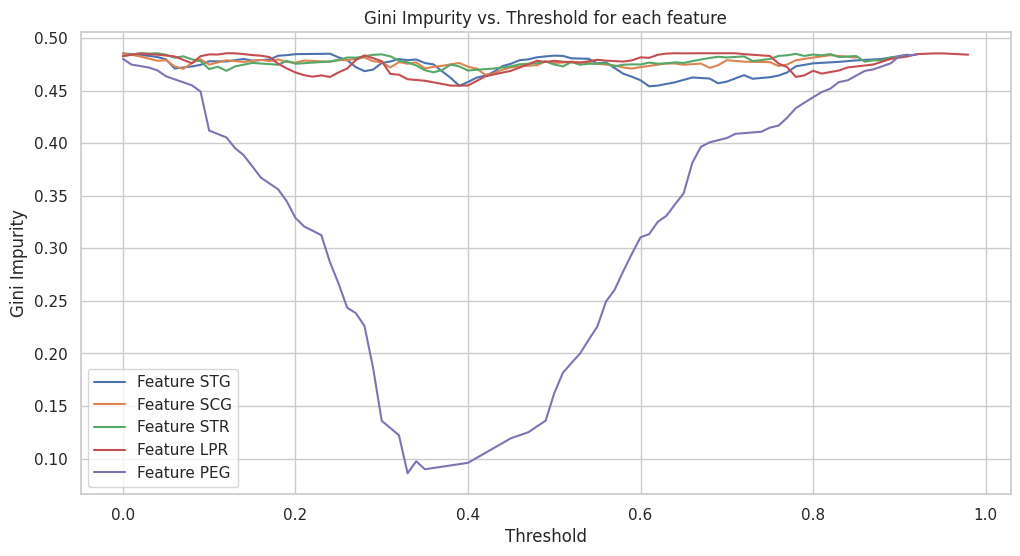

In [12]:
def calculate_gini(feature, target):
    thresholds = np.unique(feature)
    ginis = []
    for threshold in thresholds:
        left_mask = feature <= threshold
        right_mask = ~left_mask
        left_count = np.bincount(target[left_mask], minlength=2)
        right_count = np.bincount(target[right_mask], minlength=2)
        left_gini = 1 - np.sum((left_count / left_count.sum())**2)
        right_gini = 1 - np.sum((right_count / right_count.sum())**2)
        weighted_gini = (left_gini * left_count.sum() + right_gini * right_count.sum()) / target.size
        ginis.append(weighted_gini)
    return thresholds, ginis

plt.figure(figsize=(12, 6))
features = data.columns[:-1]
for feature in features:
    thresholds, ginis = calculate_gini(data[feature], data['UNS'])
    plt.plot(thresholds, ginis, label=f'Feature {feature}')

plt.title('Gini Impurity vs. Threshold for each feature')
plt.xlabel('Threshold')
plt.ylabel('Gini Impurity')
plt.legend()
plt.grid(True)
plt.show()

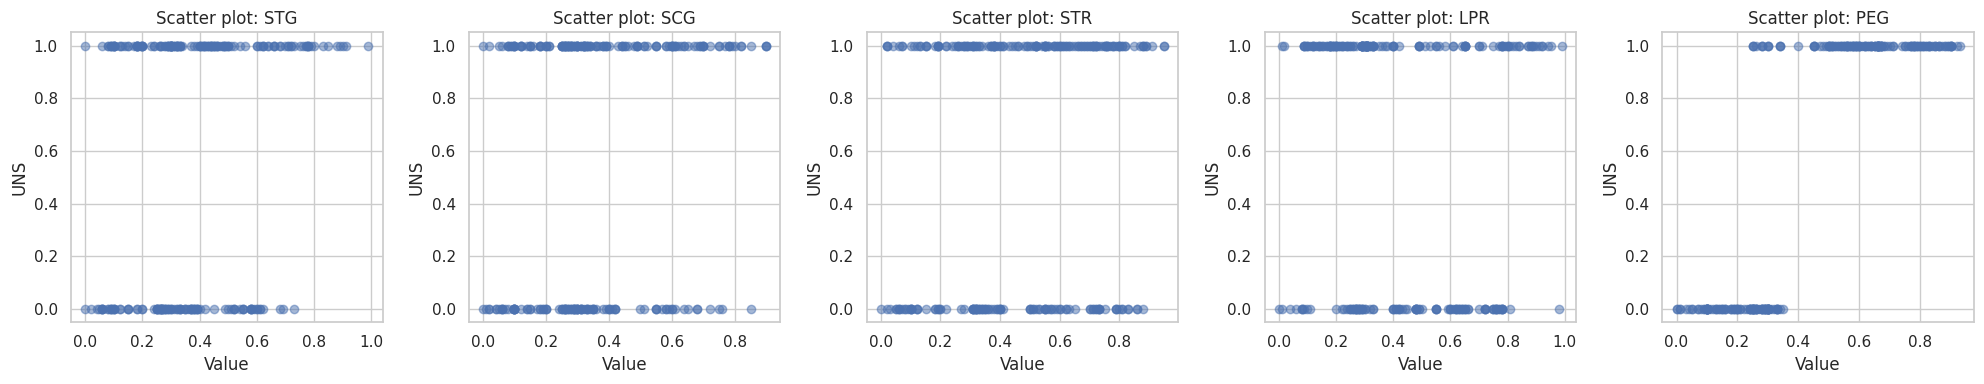

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for i, feature in enumerate(features):
    axes[i].scatter(data[feature], data['UNS'], alpha=0.5)
    axes[i].set_title(f'Scatter plot: {feature}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('UNS')

plt.tight_layout()
plt.show()

**Ответ:** На графике признак PEG (фиолетовая линия) показывает наиболее выраженное уменьшение критерия Джини. Этот признак достигает минимального значения критерия Джини в интервале порогов около 0.4 до 0.6 Это указывает на то, что признак LPR обеспечивает наиболее значимое разделение выборки на классы при определенных порогах. Исходя из графика, признак LPR является наиболее подходящим кандидатом для первого разделения в дереве решений, поскольку он обеспечивает наиболее значительное уменьшение неопределенности (критерий Джини) среди всех рассмотренных признаков.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




In [18]:
from collections import Counter
import numpy as np
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        if any(ft not in {"real", "categorical"} for ft in feature_types):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth):
        if np.all(sub_y == sub_y[0]) or len(sub_y) < self._min_samples_split or depth == self._max_depth:
            node['type'] = 'terminal'
            node['class'] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best = None, None, float('inf')
        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]
            unique_values = np.unique(sub_X[:, feature])

            for value in unique_values:
                if feature_type == 'categorical':
                    split = sub_X[:, feature] == value
                else:
                    split = sub_X[:, feature] < value

                if np.sum(split) < self._min_samples_leaf or np.sum(~split) < self._min_samples_leaf:
                    continue

                gini = self._gini(sub_y[split]) * (np.sum(split) / len(sub_X)) + self._gini(sub_y[~split]) * (np.sum(~split) / len(sub_X))
                if gini < gini_best:
                    feature_best = feature
                    gini_best = gini
                    threshold_best = value

        if feature_best is not None:
            node['type'] = 'nonterminal'
            node['feature_split'] = feature_best
            node['threshold'] = threshold_best
            node['left_child'], node['right_child'] = {}, {}
            self._fit_node(sub_X[sub_X[:, feature_best] == threshold_best], sub_y[sub_X[:, feature_best] == threshold_best], node['left_child'], depth + 1)
            self._fit_node(sub_X[sub_X[:, feature_best] != threshold_best], sub_y[sub_X[:, feature_best] != threshold_best], node['right_child'], depth + 1)

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probs = counts / counts.sum()
        return 1 - np.sum(probs**2)

    def _predict_node(self, x, node):
        if node['type'] == 'terminal':
            return node['class']

        feature_value = x[node['feature_split']]
        if self._feature_types[node['feature_split']] == 'categorical':
            if feature_value == node['threshold']:
                return self._predict_node(x, node['left_child'])
            else:
                return self._predict_node(x, node['right_child'])
        else:
            if feature_value < node['threshold']:
                return self._predict_node(x, node['left_child'])
            else:
                return self._predict_node(x, node['right_child'])

    def fit(self, X, y):
        self._tree = {}
        self._fit_node(np.array(X), np.array(y), self._tree, 0)
        return self

    def predict(self, X):
        return np.array([self._predict_node(x, self._tree) for x in np.array(X)])

    def score(self, X, y):
        predictions = self.predict(X)
        return accuracy_score(y, predictions)

    def get_params(self, deep=True):
        return {
            'feature_types': self._feature_types,
            'max_depth': self._max_depth,
            'min_samples_split': self._min_samples_split,
            'min_samples_leaf': self._min_samples_leaf
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

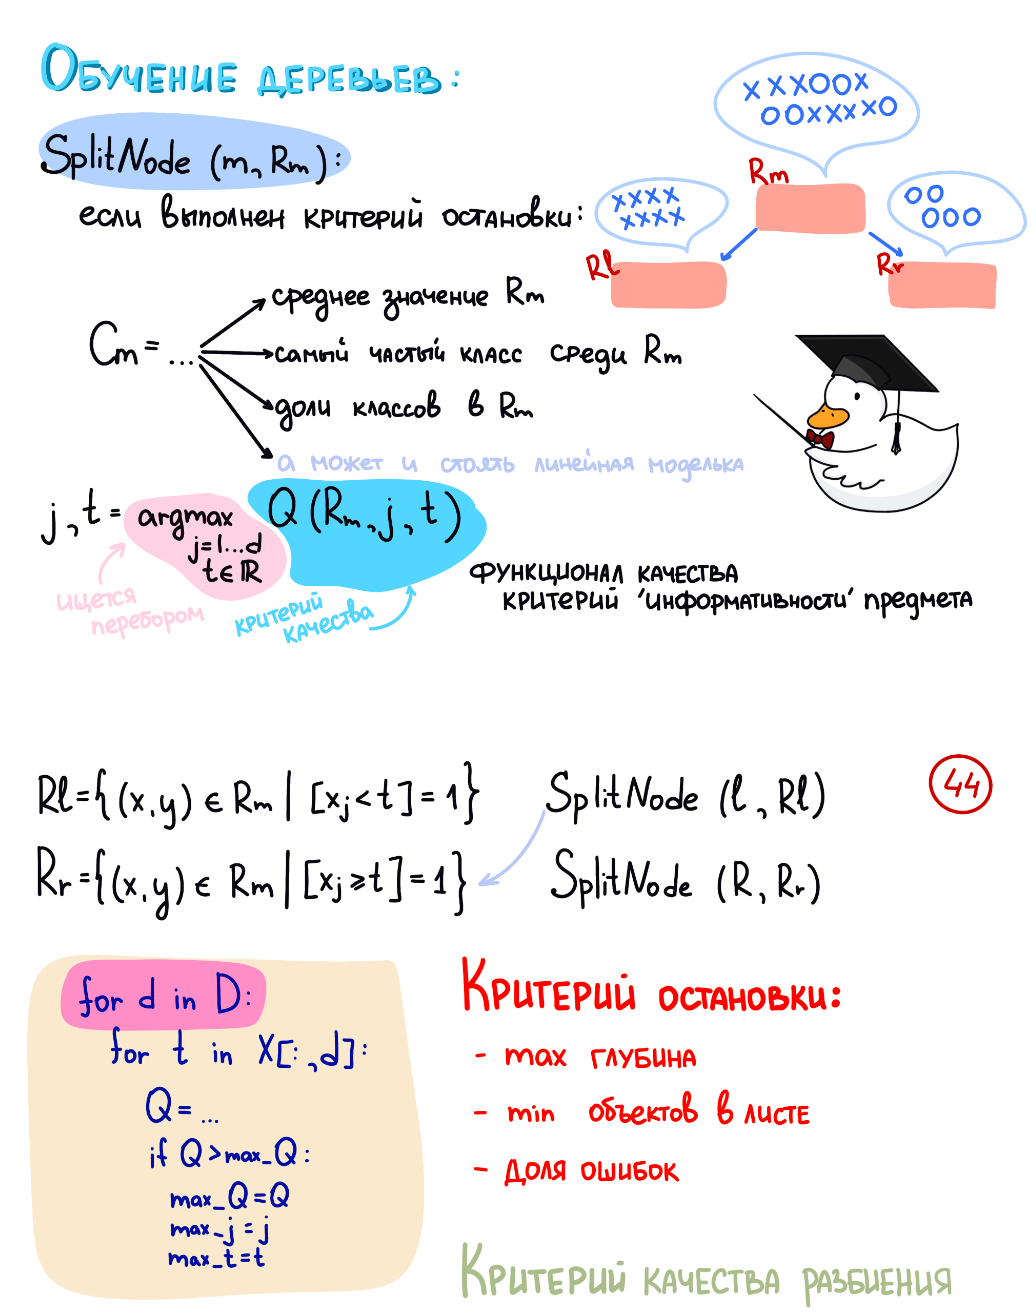

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv('agaricus-lepiota.data', header=None)

column_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
                'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
                'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
                'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
                'ring-type', 'spore-print-color', 'population', 'habitat']
data.columns = column_names

for col in data.columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

X = data.drop('class', axis=1)
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

feature_types = ['categorical'] * len(X.columns)  # Все признаки категориальные
tree = DecisionTree(feature_types)
tree.fit(X_train.values, y_train.values)

y_pred = tree.predict(X_test.values)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

tic_tac_toe_data = pd.read_csv('tic-tac-toe-endgame.csv', header=None)

cars_data = pd.read_csv('car.data', header=None)

nursery_data = pd.read_csv('nursery.data', header=None)

In [24]:
def encode_categorical_features(df):
    le = LabelEncoder()
    for column in df.columns:
        df.loc[:, column] = le.fit_transform(df[column])
    return df

def load_and_preprocess_data():

    mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)
    tic_tac_toe = pd.read_csv('tic-tac-toe-endgame.csv')
    cars = pd.read_csv('car.data', header=None)
    nursery = pd.read_csv('nursery.data', header=None)

    mushrooms_X = mushrooms.iloc[:, 1:].copy()
    mushrooms_y = mushrooms.iloc[:, 0].copy()

    tic_tac_toe_X = tic_tac_toe.iloc[:, :-1].copy()
    tic_tac_toe_y = tic_tac_toe.iloc[:, -1].copy()

    cars_X = cars.iloc[:, :-1].copy()
    cars_y = cars.iloc[:, -1].copy()
    cars_y = cars_y.apply(lambda x: 0 if x in ['unacc', 'acc'] else 1)

    nursery_X = nursery.iloc[:, :-1].copy()
    nursery_y = nursery.iloc[:, -1].copy()
    nursery_y = nursery_y.apply(lambda x: 0 if x in ['not_recom', 'recommend'] else 1)

    mushrooms_X = encode_categorical_features(mushrooms_X)
    tic_tac_toe_X = encode_categorical_features(tic_tac_toe_X)
    cars_X = encode_categorical_features(cars_X)
    nursery_X = encode_categorical_features(nursery_X)

    return mushrooms_X, mushrooms_y, tic_tac_toe_X, tic_tac_toe_y, cars_X, cars_y, nursery_X, nursery_y

def one_hot_encode_data(X):
    onehot_encoder = OneHotEncoder(sparse=False)
    return onehot_encoder.fit_transform(X)

def evaluate_model(X, y, model):
    scorer = make_scorer(accuracy_score)
    try:
        scores = cross_val_score(model, X, y, cv=10, scoring=scorer, error_score='raise')
    except Exception as e:
        print(f"Error evaluating model: {e}")
        return None, None
    return np.mean(scores), np.std(scores)

def run_pipeline():
    mushrooms_X, mushrooms_y, tic_tac_toe_X, tic_tac_toe_y, cars_X, cars_y, nursery_X, nursery_y = load_and_preprocess_data()

    mushrooms_X_onehot = one_hot_encode_data(mushrooms_X)
    tic_tac_toe_X_onehot = one_hot_encode_data(tic_tac_toe_X)
    cars_X_onehot = one_hot_encode_data(cars_X)
    nursery_X_onehot = one_hot_encode_data(nursery_X)

    datasets = [
        ('Mushrooms', mushrooms_X, mushrooms_y, mushrooms_X_onehot),
        ('Tic-Tac-Toe', tic_tac_toe_X, tic_tac_toe_y, tic_tac_toe_X_onehot),
        ('Cars', cars_X, cars_y, cars_X_onehot),
        ('Nursery', nursery_X, nursery_y, nursery_X_onehot)
    ]

    results = []

    for name, X, y, X_onehot in datasets:
        custom_tree_real = DecisionTree(feature_types=['real'] * X.shape[1])
        custom_tree_categorical = DecisionTree(feature_types=['categorical'] * X.shape[1])
        custom_tree_onehot = DecisionTree(feature_types=['real'] * X_onehot.shape[1])

        sklearn_tree = DecisionTreeClassifier()

        results.append({
            'Dataset': name,
            'Custom Tree Real': evaluate_model(X, y, custom_tree_real),
            'Custom Tree Categorical': evaluate_model(X, y, custom_tree_categorical),
            'Custom Tree OneHot': evaluate_model(X_onehot, y, custom_tree_onehot),
            'Sklearn Tree': evaluate_model(X, y, sklearn_tree)
        })

    results_df = pd.DataFrame(results)
    print(results_df)


In [25]:
run_pipeline()

       Dataset                             Custom Tree Real  \
0    Mushrooms   (0.35231278667466476, 0.17678427865984225)   
1  Tic-Tac-Toe    (0.5584978070175438, 0.35208809779622563)   
2         Cars     (0.8908959537572254, 0.1463930334216937)   
3      Nursery  (0.3325617283950617, 0.0012441755784411293)   

                       Custom Tree Categorical  \
0  (0.9996305418719211, 0.0011083743842364435)   
1    (0.5446162280701754, 0.21542234076381583)   
2      (0.919495227853206, 0.0652995577542663)   
3   (0.999537037037037, 0.0007071876072462748)   

                                 Custom Tree OneHot  \
0         (0.6478405104248087, 0.28407831777107967)   
1         (0.3091008771929825, 0.12345613809151626)   
2         (0.8753091813415781, 0.14229184649497653)   
3  (0.00015432098765432098, 0.00046296296296296287)   

                                  Sklearn Tree  
0      (0.956689025018329, 0.0971444908679451)  
1    (0.7571162280701755, 0.13791761033632294)  
2   (0.942

Custom Tree Categorical работает лучше всего для данных с преимущественно категориальными признаками. Custom Tree Real и Custom Tree OneHot могут плохо справляться с категориальными данными. Sklearn Tree показывает лучшие результаты благодаря оптимизации и гибкости алгоритма.

# Как дела?



Лабораторная понравилась. Практические примеры по построению деревьев пришлись очень кстати. Кажется, что понимания стало больше.
